In [167]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
# load data
date_list = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]
df_calendar = pd.read_csv('data/m5/calendar.csv')
df_price = pd.read_csv('data/m5/sell_prices.csv')
df_sales = pd.read_csv('data/m5/sales_train_validation.csv')
df_sales.rename(columns = dict(zip(df_sales.columns[6:], date_list)), inplace = True)

In [18]:
# explore feature names
print("Features of sales:", ",".join(df_sales.columns[:50]))
print("#----#----#")
print("Features of calendar:", ",".join(df_calendar.columns))
print("#----#----#")
print("Features of price:", ",".join(df_price.columns))

Features of sales: id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,2011-02-08,2011-02-09,2011-02-10,2011-02-11,2011-02-12,2011-02-13,2011-02-14,2011-02-15,2011-02-16,2011-02-17,2011-02-18,2011-02-19,2011-02-20,2011-02-21,2011-02-22,2011-02-23,2011-02-24,2011-02-25,2011-02-26,2011-02-27,2011-02-28,2011-03-01,2011-03-02,2011-03-03,2011-03-04,2011-03-05,2011-03-06,2011-03-07,2011-03-08,2011-03-09,2011-03-10,2011-03-11,2011-03-12,2011-03-13
#----#----#
Features of calendar: date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
#----#----#
Features of price: store_id,item_id,wm_yr_wk,sell_price


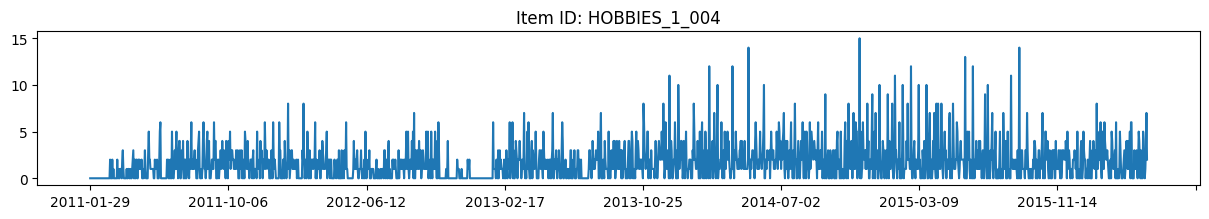

In [27]:
# explore one observation
df_sample = df_sales.iloc[3, :]
series_sample = df_sample.iloc[6:]

plt.rcParams['figure.figsize'] = [15, 2]

series_sample.plot()
plt.title('Item ID: {}'.format(df_sample['item_id']))
plt.show()

In [33]:
# Group by store
df_sales_total_by_store = df_sales.groupby(['store_id']).sum(numeric_only=True)
df_sales_total_by_store

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,3982,5437,5954,4345,3793,3722,3709,4387,5577,6113
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,4440,5352,5760,3830,3631,3691,3303,4457,5884,6082
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,5337,6936,8271,6068,5683,5235,5018,5623,7419,7721
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2496,2839,3047,2809,2677,2500,2458,2628,2954,3271
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3084,3724,4192,3410,3257,2901,2776,3022,3700,4033
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,3897,4475,4998,3311,3727,3384,3446,3902,4483,4292
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,3819,4261,4519,3147,3938,3315,3380,3691,4083,3957
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,3862,4862,4812,3236,3069,3242,3324,3991,4772,4874
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,6259,5579,5566,4347,4464,4194,4393,4988,5404,5127


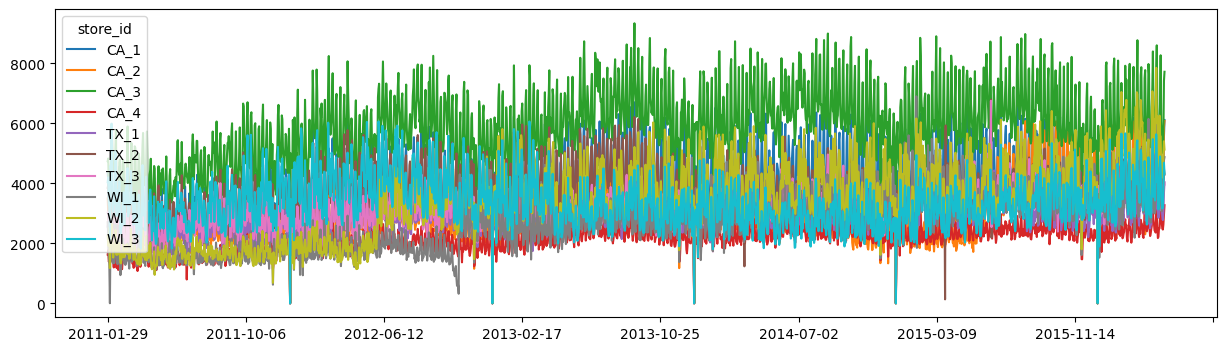

In [34]:
# time series plot by store id
plt.rcParams['figure.figsize'] = [plot_x_size, 4]

df_sales_total_by_store.T.plot()
plt.show()

CA_1
Min Dates:['2011-12-25', '2012-12-25', '2013-12-25', '2014-12-25', '2015-12-25']


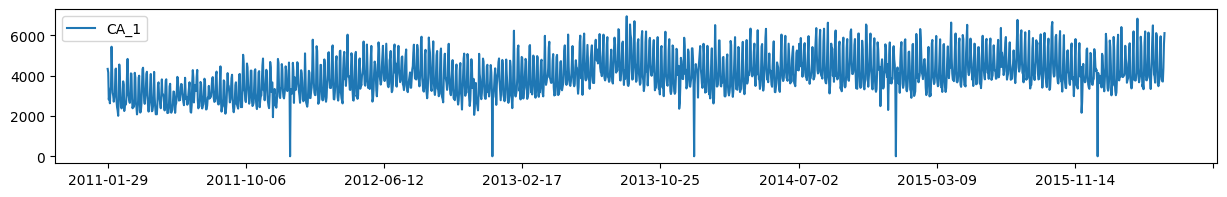

In [35]:
# time series plot of CA_1 store
series = df_sales_total_by_store.iloc[0]
print(series.name)
print('Min Dates:' + str(series[series == series.min()].index.to_list()))

plt.rcParams['figure.figsize'] = [plot_x_size, plot_y_size]

series.plot()
plt.legend()
plt.show()

## Definição do problema

Prever as vendas futuras para loja CA_1.

## É possível modelar?

Se a série for um ruído branco ou um random walk, não é possível modelar.

### Checar se a série é um ruído branco

In [52]:
import statsmodels.stats.diagnostic as diag

print("Null Hypothesis: The series has no autocorrelation.")
print("Alternate Hypothesis: The series has autocorrelation.")
 
diag.acorr_ljungbox(series, lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

Null Hypothesis: The series has no autocorrelation.
Alternate Hypothesis: The series has autocorrelation.


(array([13350.06142499]), array([0.]), array([13197.3539946]), array([0.]))

Como o p-value é menor que 0.05, rejeitamos a hipótese nula e assumimos a hipótese alternativa. Logo a série tem autocorrelação e, portanto, não é uma série de ruído branco.

### Checar se a série é um random walk

In [54]:
import statsmodels.stats.diagnostic as diag

print("Null Hypothesis: The series has no autocorrelation.")
print("Alternate Hypothesis: The series has autocorrelation.")
 
diag.acorr_ljungbox(series.diff().dropna(), lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

Null Hypothesis: The series has no autocorrelation.
Alternate Hypothesis: The series has autocorrelation.


(array([9477.18608309]), array([0.]), array([9365.16767589]), array([0.]))

Uma série é considerada random walk se sua diferenciação de ordem 1 é uma série de ruído branco. Como o p-value é menor que 0.05, rejeitamos a hipótese nula e assumimos a hipótese alternatvia. Logo, a diferenciação de primeira ordem da série não é uma série de ruído branco e, portanto, a série não é um random walk.

## Verificação de estacionariedade

### Checar se a série é não estacionária

In [50]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Null Hypothesis: The series has a unit root.")
    print("Alternate Hypothesis: The series has no unit root.")
    print()
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
adf_test(series)

Null Hypothesis: The series has a unit root.
Alternate Hypothesis: The series has no unit root.

Results of Dickey-Fuller Test:
Test Statistic                   -2.035408
p-value                           0.271267
#Lags Used                       26.000000
Number of Observations Used    1886.000000
Critical Value (1%)              -3.433822
Critical Value (5%)              -2.863074
Critical Value (10%)             -2.567586
dtype: float64


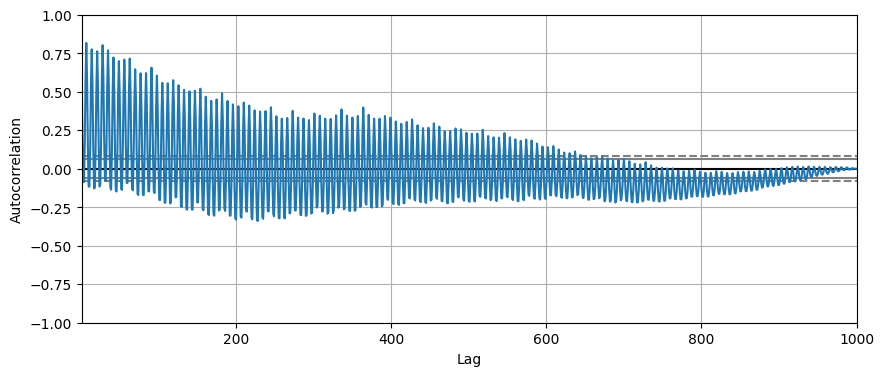

In [301]:
pd.plotting.autocorrelation_plot(series[:1000])
plt.grid('on')
plt.show()

Como o p-value é maior que 0,05, falhamos em rejeitar a hipótese nula. Logo a série tem uma raiz unitária. Isso quer dizer que a série não é estacionária.

### Checar se a diferenciação da série é estacionária

In [55]:
adf_test(series.diff().dropna())

Null Hypothesis: The series has a unit root.
Alternate Hypothesis: The series has no unit root.

Results of Dickey-Fuller Test:
Test Statistic                  -20.626012
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    1885.000000
Critical Value (1%)              -3.433824
Critical Value (5%)              -2.863075
Critical Value (10%)             -2.567587
dtype: float64


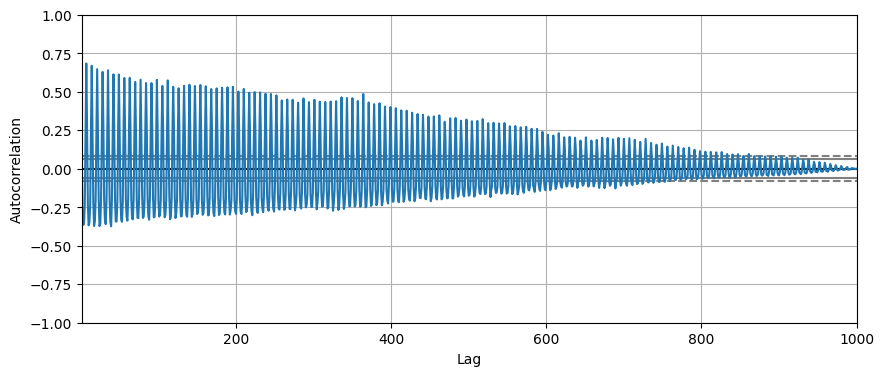

In [302]:
pd.plotting.autocorrelation_plot(series.diff().dropna()[:1000])
plt.grid('on')
plt.show()

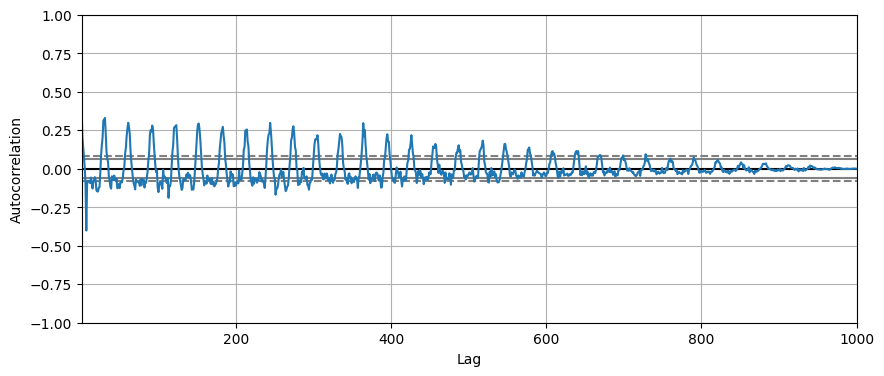

In [303]:
pd.plotting.autocorrelation_plot(series.diff(7).dropna()[:1000])
plt.grid('on')
plt.show()

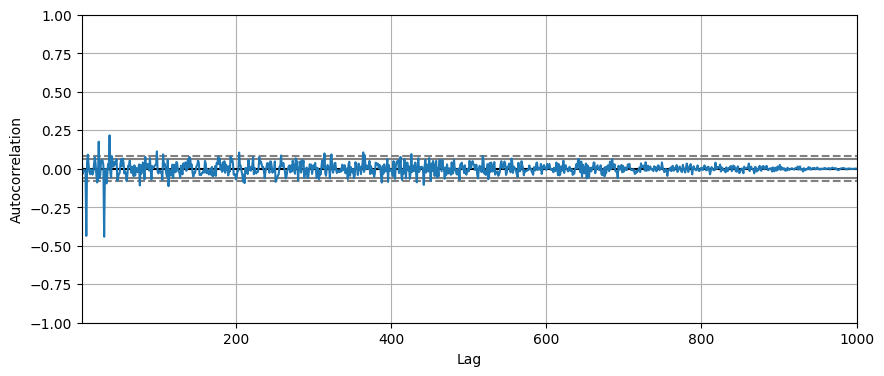

In [305]:
pd.plotting.autocorrelation_plot(series.diff(30).diff(7).dropna()[:1000])
plt.grid('on')
plt.show()

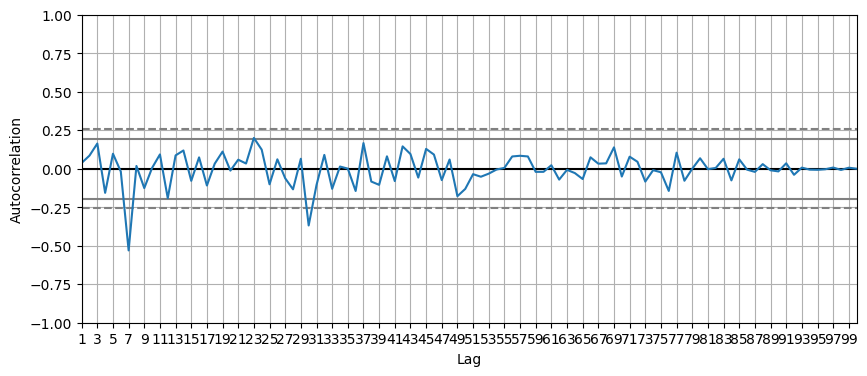

In [307]:
pd.plotting.autocorrelation_plot(series.diff(30).diff(7).dropna()[:100])
plt.xticks(list(range(1,101,2)))
plt.grid('on')
plt.show()

Como o p-value é menor que 0.05, a diferenciação da série é estacionária!

## Verificar sazonalidade

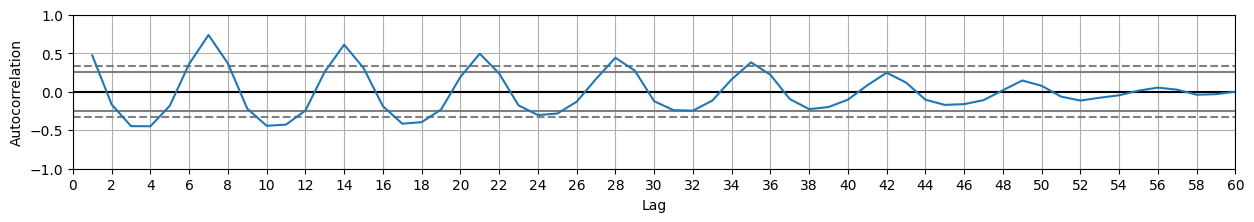

In [63]:
pd.plotting.autocorrelation_plot(series[:60])
plt.grid('on')
plt.xticks(list(range(0,61,2)))
plt.show()

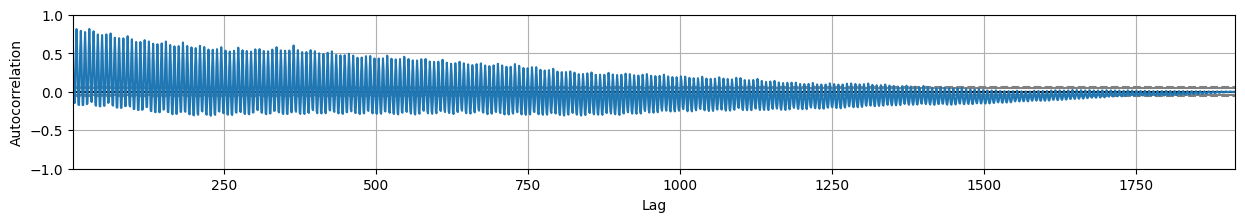

In [61]:
pd.plotting.autocorrelation_plot(series)
plt.grid('on')
plt.show()

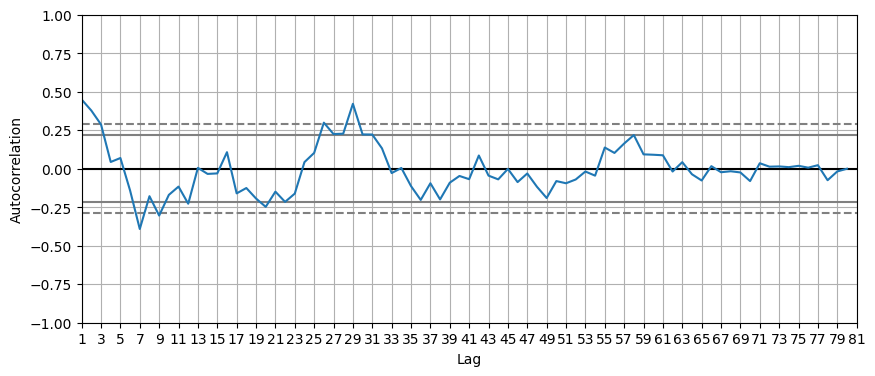

In [268]:
pd.plotting.autocorrelation_plot(series.diff(7).dropna().iloc[:80])
plt.xticks(list(range(1,82,2)))
plt.grid('on')
plt.show()

- O gráfico de autocorrelação decai indicando presença de tendência na série
- O gráfico de autocorrelação oscila, indicando presença de sazonalidade na série

## Escolha do método de modelagem

Duas opções:

- Diferenciar a série e usar métodos clássicos para séries estacionárias
- Modelar a série diretamente

Esolheremos a segunda opção, ou seja, vamos modelar a série original diretamente sem uso de diferenciação ou dos métodos clássicos.

## Engenharia de variáveis

In [64]:
def create_xy(series, window_size, prediction_horizon, shuffle = False):
    x = []
    y = []
    for i in range(0, len(series)):
        if len(series[(i + window_size):(i + window_size + prediction_horizon)]) < prediction_horizon:
            break
        x.append(series[i:(i + window_size)])
        y.append(series[(i + window_size):(i + window_size + prediction_horizon)])
    x = np.array(x)
    y = np.array(y)
    return x,y

### Separação de treino e teste

In [74]:
window_size = 365
prediction_horizon = 1

### TRAIN VAL SPLIT ### (include shuffling later)
test_size = 28
split_time = len(series) - test_size

train_series = series[:split_time]
test_series = series[split_time - window_size:]

train_x, train_y = create_xy(train_series, window_size, prediction_horizon)
test_x, test_y = create_xy(test_series, window_size, prediction_horizon)

train_y = train_y.flatten()
test_y = test_y.flatten()

print("X_train:", train_x.shape)
print("y_train:", train_y.shape)
print("X_test:", test_x.shape)
print("y_test:", test_y.shape)

X_train: (1520, 365)
y_train: (1520,)
X_test: (28, 365)
y_test: (28,)


### Escolha do modelo

In [69]:
import lightgbm as lgb

params = {
    'n_estimators': 2000,
    'max_depth': 4,
    'num_leaves': 2**4,
    'learning_rate': 0.1,
    'boosting_type': 'dart'
}

model = lgb.LGBMRegressor(first_metric_only = True, **params)

model.fit(train_x, train_y,
          eval_metric = 'l1', 
          eval_set = [(test_x, test_y)])

[1]	valid_0's l1: 758.624	valid_0's l2: 903138
[2]	valid_0's l1: 712.283	valid_0's l2: 783225
[3]	valid_0's l1: 662.372	valid_0's l2: 673450
[4]	valid_0's l1: 614.662	valid_0's l2: 581461
[5]	valid_0's l1: 576.865	valid_0's l2: 511947
[6]	valid_0's l1: 538.852	valid_0's l2: 449292
[7]	valid_0's l1: 504.128	valid_0's l2: 398902
[8]	valid_0's l1: 522.647	valid_0's l2: 427950
[9]	valid_0's l1: 489.625	valid_0's l2: 382934
[10]	valid_0's l1: 460.859	valid_0's l2: 345705
[11]	valid_0's l1: 440.233	valid_0's l2: 317709
[12]	valid_0's l1: 450.726	valid_0's l2: 331423
[13]	valid_0's l1: 425.442	valid_0's l2: 298189
[14]	valid_0's l1: 407.007	valid_0's l2: 272571
[15]	valid_0's l1: 388.903	valid_0's l2: 252209
[16]	valid_0's l1: 372.495	valid_0's l2: 236172
[17]	valid_0's l1: 353.032	valid_0's l2: 217354
[18]	valid_0's l1: 342.903	valid_0's l2: 206629
[19]	valid_0's l1: 327.166	valid_0's l2: 191970
[20]	valid_0's l1: 316.266	valid_0's l2: 180193
[21]	valid_0's l1: 323.84	valid_0's l2: 187320
[2

[180]	valid_0's l1: 379.433	valid_0's l2: 230961
[181]	valid_0's l1: 354.867	valid_0's l2: 209589
[182]	valid_0's l1: 335.089	valid_0's l2: 191596
[183]	valid_0's l1: 318.047	valid_0's l2: 176023
[184]	valid_0's l1: 303.223	valid_0's l2: 163587
[185]	valid_0's l1: 318.079	valid_0's l2: 175952
[186]	valid_0's l1: 304.405	valid_0's l2: 164447
[187]	valid_0's l1: 293.408	valid_0's l2: 155704
[188]	valid_0's l1: 282.913	valid_0's l2: 147673
[189]	valid_0's l1: 294.741	valid_0's l2: 156138
[190]	valid_0's l1: 306.688	valid_0's l2: 165260
[191]	valid_0's l1: 294.024	valid_0's l2: 155898
[192]	valid_0's l1: 281.567	valid_0's l2: 146568
[193]	valid_0's l1: 272.307	valid_0's l2: 140729
[194]	valid_0's l1: 283.466	valid_0's l2: 147950
[195]	valid_0's l1: 294.283	valid_0's l2: 155392
[196]	valid_0's l1: 282.173	valid_0's l2: 147750
[197]	valid_0's l1: 290.118	valid_0's l2: 153219
[198]	valid_0's l1: 300.622	valid_0's l2: 160885
[199]	valid_0's l1: 290.319	valid_0's l2: 153264
[200]	valid_0's l1: 

[390]	valid_0's l1: 220.079	valid_0's l2: 112039
[391]	valid_0's l1: 223.682	valid_0's l2: 113784
[392]	valid_0's l1: 220.79	valid_0's l2: 111764
[393]	valid_0's l1: 218.101	valid_0's l2: 110456
[394]	valid_0's l1: 216.436	valid_0's l2: 109774
[395]	valid_0's l1: 215.66	valid_0's l2: 110006
[396]	valid_0's l1: 217.893	valid_0's l2: 111496
[397]	valid_0's l1: 216.61	valid_0's l2: 110897
[398]	valid_0's l1: 216.031	valid_0's l2: 110299
[399]	valid_0's l1: 215.413	valid_0's l2: 109398
[400]	valid_0's l1: 214.626	valid_0's l2: 108783
[401]	valid_0's l1: 216.033	valid_0's l2: 110136
[402]	valid_0's l1: 215.706	valid_0's l2: 109302
[403]	valid_0's l1: 217.412	valid_0's l2: 110940
[404]	valid_0's l1: 215.079	valid_0's l2: 109243
[405]	valid_0's l1: 214.797	valid_0's l2: 109004
[406]	valid_0's l1: 224.742	valid_0's l2: 113662
[407]	valid_0's l1: 221.532	valid_0's l2: 112398
[408]	valid_0's l1: 225.311	valid_0's l2: 114081
[409]	valid_0's l1: 222.59	valid_0's l2: 112610
[410]	valid_0's l1: 219.

[593]	valid_0's l1: 232.236	valid_0's l2: 119149
[594]	valid_0's l1: 236.021	valid_0's l2: 120825
[595]	valid_0's l1: 239.208	valid_0's l2: 122455
[596]	valid_0's l1: 233.267	valid_0's l2: 119461
[597]	valid_0's l1: 236.468	valid_0's l2: 121035
[598]	valid_0's l1: 239.584	valid_0's l2: 122515
[599]	valid_0's l1: 233.429	valid_0's l2: 118743
[600]	valid_0's l1: 228.598	valid_0's l2: 116668
[601]	valid_0's l1: 223.85	valid_0's l2: 114636
[602]	valid_0's l1: 226.914	valid_0's l2: 116043
[603]	valid_0's l1: 222.849	valid_0's l2: 113986
[604]	valid_0's l1: 225.988	valid_0's l2: 115419
[605]	valid_0's l1: 229.206	valid_0's l2: 116838
[606]	valid_0's l1: 232.729	valid_0's l2: 118409
[607]	valid_0's l1: 236.066	valid_0's l2: 119979
[608]	valid_0's l1: 230.856	valid_0's l2: 118231
[609]	valid_0's l1: 226.091	valid_0's l2: 116037
[610]	valid_0's l1: 221.678	valid_0's l2: 113166
[611]	valid_0's l1: 220.467	valid_0's l2: 112206
[612]	valid_0's l1: 219.675	valid_0's l2: 111545
[613]	valid_0's l1: 2

[792]	valid_0's l1: 217.648	valid_0's l2: 108105
[793]	valid_0's l1: 216.516	valid_0's l2: 106835
[794]	valid_0's l1: 217.187	valid_0's l2: 107567
[795]	valid_0's l1: 216.073	valid_0's l2: 106692
[796]	valid_0's l1: 216.676	valid_0's l2: 107452
[797]	valid_0's l1: 217.616	valid_0's l2: 108284
[798]	valid_0's l1: 218.595	valid_0's l2: 109116
[799]	valid_0's l1: 217.404	valid_0's l2: 107982
[800]	valid_0's l1: 218.448	valid_0's l2: 108888
[801]	valid_0's l1: 216.918	valid_0's l2: 107921
[802]	valid_0's l1: 217.85	valid_0's l2: 108795
[803]	valid_0's l1: 219.074	valid_0's l2: 109607
[804]	valid_0's l1: 220.605	valid_0's l2: 110636
[805]	valid_0's l1: 221.726	valid_0's l2: 111389
[806]	valid_0's l1: 223.495	valid_0's l2: 112387
[807]	valid_0's l1: 220.818	valid_0's l2: 110676
[808]	valid_0's l1: 218.306	valid_0's l2: 109264
[809]	valid_0's l1: 219.717	valid_0's l2: 110100
[810]	valid_0's l1: 217.191	valid_0's l2: 108346
[811]	valid_0's l1: 215.914	valid_0's l2: 107249
[812]	valid_0's l1: 2

[1000]	valid_0's l1: 206.353	valid_0's l2: 105254
[1001]	valid_0's l1: 206.889	valid_0's l2: 105698
[1002]	valid_0's l1: 207.538	valid_0's l2: 106222
[1003]	valid_0's l1: 207.706	valid_0's l2: 105729
[1004]	valid_0's l1: 206.365	valid_0's l2: 104347
[1005]	valid_0's l1: 206.2	valid_0's l2: 103807
[1006]	valid_0's l1: 206.705	valid_0's l2: 104236
[1007]	valid_0's l1: 206.841	valid_0's l2: 103970
[1008]	valid_0's l1: 206.509	valid_0's l2: 103481
[1009]	valid_0's l1: 206.418	valid_0's l2: 103227
[1010]	valid_0's l1: 206.337	valid_0's l2: 102986
[1011]	valid_0's l1: 207.454	valid_0's l2: 104106
[1012]	valid_0's l1: 206.944	valid_0's l2: 103783
[1013]	valid_0's l1: 207.505	valid_0's l2: 104281
[1014]	valid_0's l1: 206.55	valid_0's l2: 103757
[1015]	valid_0's l1: 206.196	valid_0's l2: 103405
[1016]	valid_0's l1: 206.091	valid_0's l2: 103345
[1017]	valid_0's l1: 206.434	valid_0's l2: 103631
[1018]	valid_0's l1: 206.955	valid_0's l2: 104033
[1019]	valid_0's l1: 207.569	valid_0's l2: 104548
[10

[1205]	valid_0's l1: 201.124	valid_0's l2: 98243.7
[1206]	valid_0's l1: 200.325	valid_0's l2: 97523.3
[1207]	valid_0's l1: 200.034	valid_0's l2: 97221
[1208]	valid_0's l1: 199.844	valid_0's l2: 97344.5
[1209]	valid_0's l1: 199.69	valid_0's l2: 97162.9
[1210]	valid_0's l1: 198.9	valid_0's l2: 96599.6
[1211]	valid_0's l1: 199.03	valid_0's l2: 96435.9
[1212]	valid_0's l1: 199.114	valid_0's l2: 96638.6
[1213]	valid_0's l1: 199.15	valid_0's l2: 96433.4
[1214]	valid_0's l1: 199.245	valid_0's l2: 96392.1
[1215]	valid_0's l1: 199.302	valid_0's l2: 96649.1
[1216]	valid_0's l1: 199.375	valid_0's l2: 96862
[1217]	valid_0's l1: 199.073	valid_0's l2: 96614.3
[1218]	valid_0's l1: 198.403	valid_0's l2: 96411.1
[1219]	valid_0's l1: 198.417	valid_0's l2: 96616.9
[1220]	valid_0's l1: 198.38	valid_0's l2: 96364.8
[1221]	valid_0's l1: 198.396	valid_0's l2: 96533.7
[1222]	valid_0's l1: 198.19	valid_0's l2: 96308.3
[1223]	valid_0's l1: 198.238	valid_0's l2: 96560
[1224]	valid_0's l1: 198.426	valid_0's l2: 9

[1370]	valid_0's l1: 195.957	valid_0's l2: 94178
[1371]	valid_0's l1: 196.042	valid_0's l2: 94346
[1372]	valid_0's l1: 196.222	valid_0's l2: 94335.5
[1373]	valid_0's l1: 196.449	valid_0's l2: 94334.4
[1374]	valid_0's l1: 196.463	valid_0's l2: 94441.2
[1375]	valid_0's l1: 196.39	valid_0's l2: 94406.6
[1376]	valid_0's l1: 197.276	valid_0's l2: 94892
[1377]	valid_0's l1: 197.551	valid_0's l2: 95194.2
[1378]	valid_0's l1: 197.774	valid_0's l2: 95423.9
[1379]	valid_0's l1: 197.187	valid_0's l2: 95147.8
[1380]	valid_0's l1: 196.63	valid_0's l2: 94863.6
[1381]	valid_0's l1: 196.874	valid_0's l2: 94739.2
[1382]	valid_0's l1: 197.123	valid_0's l2: 94933.6
[1383]	valid_0's l1: 197.34	valid_0's l2: 95168.6
[1384]	valid_0's l1: 197.568	valid_0's l2: 95403.8
[1385]	valid_0's l1: 197.77	valid_0's l2: 95642.4
[1386]	valid_0's l1: 198.033	valid_0's l2: 95943.9
[1387]	valid_0's l1: 198.387	valid_0's l2: 95854.9
[1388]	valid_0's l1: 197.909	valid_0's l2: 95416.3
[1389]	valid_0's l1: 198.179	valid_0's l2

[1576]	valid_0's l1: 196.244	valid_0's l2: 93055.3
[1577]	valid_0's l1: 196.244	valid_0's l2: 93057.2
[1578]	valid_0's l1: 196.362	valid_0's l2: 93244.4
[1579]	valid_0's l1: 196.388	valid_0's l2: 93358.6
[1580]	valid_0's l1: 196.444	valid_0's l2: 93441.1
[1581]	valid_0's l1: 196.583	valid_0's l2: 93321.7
[1582]	valid_0's l1: 196.24	valid_0's l2: 93187.8
[1583]	valid_0's l1: 196.237	valid_0's l2: 93265.2
[1584]	valid_0's l1: 196.417	valid_0's l2: 93329.3
[1585]	valid_0's l1: 196.299	valid_0's l2: 93086.8
[1586]	valid_0's l1: 196.117	valid_0's l2: 92945.4
[1587]	valid_0's l1: 196.155	valid_0's l2: 93022.8
[1588]	valid_0's l1: 196.224	valid_0's l2: 93164.9
[1589]	valid_0's l1: 196.271	valid_0's l2: 93125.1
[1590]	valid_0's l1: 196.31	valid_0's l2: 93234.6
[1591]	valid_0's l1: 196.407	valid_0's l2: 93344.1
[1592]	valid_0's l1: 196.596	valid_0's l2: 93458.3
[1593]	valid_0's l1: 196.932	valid_0's l2: 93627.7
[1594]	valid_0's l1: 197.377	valid_0's l2: 93777.7
[1595]	valid_0's l1: 196.57	valid

[1766]	valid_0's l1: 201.248	valid_0's l2: 94001
[1767]	valid_0's l1: 200.49	valid_0's l2: 93365.5
[1768]	valid_0's l1: 200.091	valid_0's l2: 93174.1
[1769]	valid_0's l1: 199.564	valid_0's l2: 93001.9
[1770]	valid_0's l1: 199.944	valid_0's l2: 93156.8
[1771]	valid_0's l1: 199.542	valid_0's l2: 92923.5
[1772]	valid_0's l1: 201.177	valid_0's l2: 93441.5
[1773]	valid_0's l1: 201.538	valid_0's l2: 93638.2
[1774]	valid_0's l1: 201.1	valid_0's l2: 93337.7
[1775]	valid_0's l1: 201.495	valid_0's l2: 93564.6
[1776]	valid_0's l1: 200.976	valid_0's l2: 93309.2
[1777]	valid_0's l1: 201.387	valid_0's l2: 93536.2
[1778]	valid_0's l1: 200.755	valid_0's l2: 93277.6
[1779]	valid_0's l1: 201.212	valid_0's l2: 93462
[1780]	valid_0's l1: 200.758	valid_0's l2: 93267.9
[1781]	valid_0's l1: 200.323	valid_0's l2: 93018.6
[1782]	valid_0's l1: 200.664	valid_0's l2: 93169.9
[1783]	valid_0's l1: 200.292	valid_0's l2: 93182.3
[1784]	valid_0's l1: 199.959	valid_0's l2: 92995.3
[1785]	valid_0's l1: 200.179	valid_0's

[1963]	valid_0's l1: 200.948	valid_0's l2: 93087
[1964]	valid_0's l1: 200.551	valid_0's l2: 92963.8
[1965]	valid_0's l1: 200.394	valid_0's l2: 92815.3
[1966]	valid_0's l1: 200.591	valid_0's l2: 92972.6
[1967]	valid_0's l1: 200.507	valid_0's l2: 92905.1
[1968]	valid_0's l1: 200.581	valid_0's l2: 92678.8
[1969]	valid_0's l1: 200.615	valid_0's l2: 92802.1
[1970]	valid_0's l1: 200.76	valid_0's l2: 92953.9
[1971]	valid_0's l1: 200.445	valid_0's l2: 92889.1
[1972]	valid_0's l1: 200.453	valid_0's l2: 93004
[1973]	valid_0's l1: 200.6	valid_0's l2: 93118.8
[1974]	valid_0's l1: 200.686	valid_0's l2: 93319.1
[1975]	valid_0's l1: 200.716	valid_0's l2: 93216.2
[1976]	valid_0's l1: 200.773	valid_0's l2: 93349.9
[1977]	valid_0's l1: 200.909	valid_0's l2: 93464.7
[1978]	valid_0's l1: 200.677	valid_0's l2: 93294.7
[1979]	valid_0's l1: 200.848	valid_0's l2: 93290.9
[1980]	valid_0's l1: 200.858	valid_0's l2: 93384.8
[1981]	valid_0's l1: 201.003	valid_0's l2: 93510.7
[1982]	valid_0's l1: 201.19	valid_0's 

LGBMRegressor(boosting_type='dart', first_metric_only=True, max_depth=4,
              n_estimators=2000, num_leaves=16)

     Naive MAE: 698.0000
  s7-Naive MAE: 372.2857
 s30-Naive MAE: 330.8214
s365-Naive MAE: 247.9286
  LightGBM MAE: 200.5037


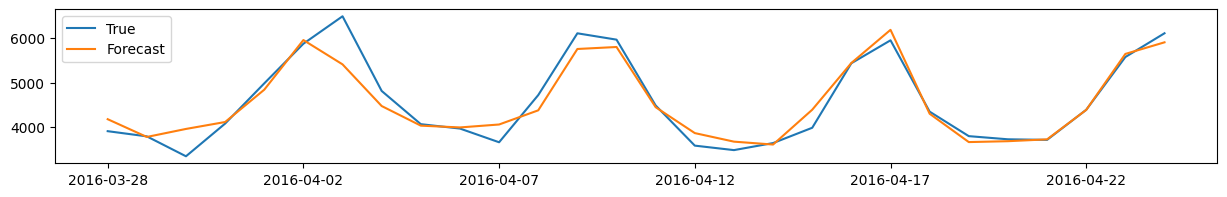

In [70]:
forecast = model.predict(test_x)
s1_naive = series[-29:-1].to_numpy()
s7_naive = series[-35:-7].to_numpy()
s30_naive = series[-56:-28].to_numpy()
s365_naive = series[-364:-336].to_numpy()

print('     Naive MAE: %.4f' % (np.mean(np.abs(s1_naive - test_y))))
print('  s7-Naive MAE: %.4f' % (np.mean(np.abs(s7_naive - test_y))))
print(' s30-Naive MAE: %.4f' % (np.mean(np.abs(s30_naive - test_y))))
print('s365-Naive MAE: %.4f' % (np.mean(np.abs(s365_naive - test_y))))
print('  LightGBM MAE: %.4f' % (np.mean(np.abs(forecast - test_y))))

plt.rcParams['figure.figsize'] = [plot_x_size, plot_y_size]

series[-test_size:].plot(label = 'True')
plt.plot(forecast, label = 'Forecast')
plt.legend()
plt.show()

## Tunando o tamanho da janela

  7 --- MAE: -333.105 (21.291)
 30 --- MAE: -307.008 (21.648)
180 --- MAE: -291.474 (22.537)
365 --- MAE: -275.644 (17.895)
545 --- MAE: -277.332 (20.982)
730 --- MAE: -275.664 (23.006)


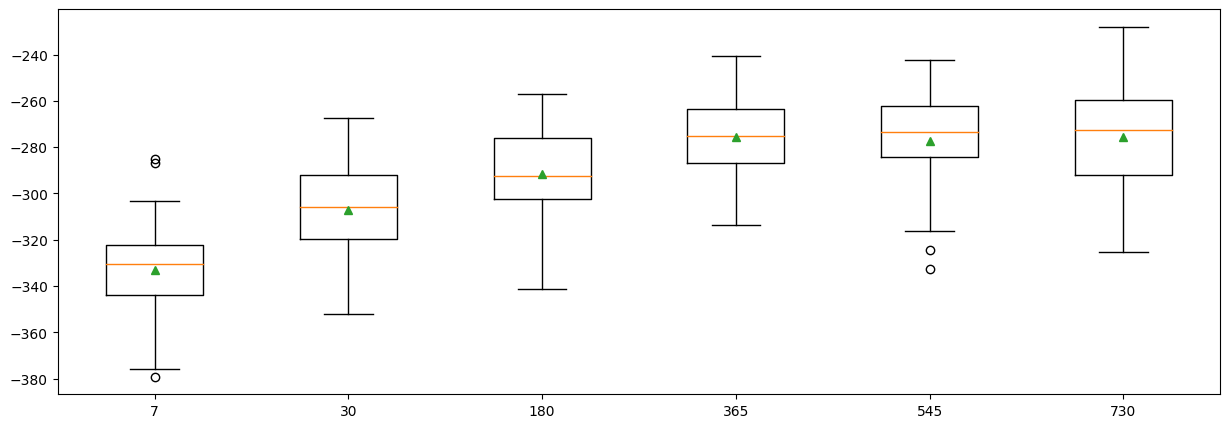

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

params = {
    'n_estimators': 2000,
    'max_depth': 4,
    'num_leaves': 2**4,
    'learning_rate': 0.1,
    'boosting_type': 'dart'
}

windows = [7, 30, 180, 365, 545, 730]

results = []
names = []
for w in windows:

    window_size = w

    train_x, train_y = create_xy(train_series, window_size, prediction_horizon)

    train_y = train_y.flatten()

    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 123)
    scores = cross_val_score(lgb.LGBMRegressor(**params), train_x, train_y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(w)
    print('%3d --- MAE: %.3f (%.3f)' % (w, np.mean(scores), np.std(scores)))

plt.rcParams['figure.figsize'] = [plot_x_size, 5]    
    
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

### Predição recursiva

In [78]:
window_size = 365
prediction_horizon = 1

### TRAIN VAL SPLIT ### (include shuffling later)
test_size = 28
split_time = len(series) - test_size

train_series = series[:split_time]
test_series = series[split_time - window_size:]

train_x, train_y = create_xy(train_series, window_size, prediction_horizon)
test_x, test_y = create_xy(test_series, window_size, prediction_horizon)

train_y = train_y.flatten()
test_y = test_y.flatten()

print("X_train:", train_x.shape)
print("y_train:", train_y.shape)
print("X_test:", test_x.shape)
print("y_test:", test_y.shape)

X_train: (1520, 365)
y_train: (1520,)
X_test: (28, 365)
y_test: (28,)


In [79]:
params = {
    'n_estimators': 2000,
    'max_depth': 4,
    'num_leaves': 2**4,
    'learning_rate': 0.1,
    'boosting_type': 'dart'
}

model = lgb.LGBMRegressor(first_metric_only = True, **params)

model.fit(train_x, train_y,
          eval_metric = 'l1', 
          eval_set = [(test_x, test_y)])

[1]	valid_0's l1: 758.624	valid_0's l2: 903138
[2]	valid_0's l1: 712.283	valid_0's l2: 783225
[3]	valid_0's l1: 662.372	valid_0's l2: 673450
[4]	valid_0's l1: 614.662	valid_0's l2: 581461
[5]	valid_0's l1: 576.865	valid_0's l2: 511947
[6]	valid_0's l1: 538.852	valid_0's l2: 449292
[7]	valid_0's l1: 504.128	valid_0's l2: 398902
[8]	valid_0's l1: 522.647	valid_0's l2: 427950
[9]	valid_0's l1: 489.625	valid_0's l2: 382934
[10]	valid_0's l1: 460.859	valid_0's l2: 345705
[11]	valid_0's l1: 440.233	valid_0's l2: 317709
[12]	valid_0's l1: 450.726	valid_0's l2: 331423
[13]	valid_0's l1: 425.442	valid_0's l2: 298189
[14]	valid_0's l1: 407.007	valid_0's l2: 272571
[15]	valid_0's l1: 388.903	valid_0's l2: 252209
[16]	valid_0's l1: 372.495	valid_0's l2: 236172
[17]	valid_0's l1: 353.032	valid_0's l2: 217354
[18]	valid_0's l1: 342.903	valid_0's l2: 206629
[19]	valid_0's l1: 327.166	valid_0's l2: 191970
[20]	valid_0's l1: 316.266	valid_0's l2: 180193
[21]	valid_0's l1: 323.84	valid_0's l2: 187320
[2

[182]	valid_0's l1: 335.089	valid_0's l2: 191596
[183]	valid_0's l1: 318.047	valid_0's l2: 176023
[184]	valid_0's l1: 303.223	valid_0's l2: 163587
[185]	valid_0's l1: 318.079	valid_0's l2: 175952
[186]	valid_0's l1: 304.405	valid_0's l2: 164447
[187]	valid_0's l1: 293.408	valid_0's l2: 155704
[188]	valid_0's l1: 282.913	valid_0's l2: 147673
[189]	valid_0's l1: 294.741	valid_0's l2: 156138
[190]	valid_0's l1: 306.688	valid_0's l2: 165260
[191]	valid_0's l1: 294.024	valid_0's l2: 155898
[192]	valid_0's l1: 281.567	valid_0's l2: 146568
[193]	valid_0's l1: 272.307	valid_0's l2: 140729
[194]	valid_0's l1: 283.466	valid_0's l2: 147950
[195]	valid_0's l1: 294.283	valid_0's l2: 155392
[196]	valid_0's l1: 282.173	valid_0's l2: 147750
[197]	valid_0's l1: 290.118	valid_0's l2: 153219
[198]	valid_0's l1: 300.622	valid_0's l2: 160885
[199]	valid_0's l1: 290.319	valid_0's l2: 153264
[200]	valid_0's l1: 304.512	valid_0's l2: 163710
[201]	valid_0's l1: 317.092	valid_0's l2: 173848
[202]	valid_0's l1: 

[383]	valid_0's l1: 238.164	valid_0's l2: 121049
[384]	valid_0's l1: 231.513	valid_0's l2: 116988
[385]	valid_0's l1: 237.587	valid_0's l2: 119854
[386]	valid_0's l1: 232.958	valid_0's l2: 117394
[387]	valid_0's l1: 228.384	valid_0's l2: 115671
[388]	valid_0's l1: 224.579	valid_0's l2: 113976
[389]	valid_0's l1: 221.768	valid_0's l2: 113150
[390]	valid_0's l1: 220.079	valid_0's l2: 112039
[391]	valid_0's l1: 223.682	valid_0's l2: 113784
[392]	valid_0's l1: 220.79	valid_0's l2: 111764
[393]	valid_0's l1: 218.101	valid_0's l2: 110456
[394]	valid_0's l1: 216.436	valid_0's l2: 109774
[395]	valid_0's l1: 215.66	valid_0's l2: 110006
[396]	valid_0's l1: 217.893	valid_0's l2: 111496
[397]	valid_0's l1: 216.61	valid_0's l2: 110897
[398]	valid_0's l1: 216.031	valid_0's l2: 110299
[399]	valid_0's l1: 215.413	valid_0's l2: 109398
[400]	valid_0's l1: 214.626	valid_0's l2: 108783
[401]	valid_0's l1: 216.033	valid_0's l2: 110136
[402]	valid_0's l1: 215.706	valid_0's l2: 109302
[403]	valid_0's l1: 217

[580]	valid_0's l1: 229.259	valid_0's l2: 118271
[581]	valid_0's l1: 224.177	valid_0's l2: 115879
[582]	valid_0's l1: 227.444	valid_0's l2: 117291
[583]	valid_0's l1: 222.752	valid_0's l2: 114953
[584]	valid_0's l1: 225.493	valid_0's l2: 116278
[585]	valid_0's l1: 221.713	valid_0's l2: 114415
[586]	valid_0's l1: 224.433	valid_0's l2: 115844
[587]	valid_0's l1: 221.821	valid_0's l2: 114429
[588]	valid_0's l1: 224.508	valid_0's l2: 115683
[589]	valid_0's l1: 227.179	valid_0's l2: 116939
[590]	valid_0's l1: 231.113	valid_0's l2: 118575
[591]	valid_0's l1: 234.199	valid_0's l2: 119960
[592]	valid_0's l1: 237.567	valid_0's l2: 121593
[593]	valid_0's l1: 232.236	valid_0's l2: 119149
[594]	valid_0's l1: 236.021	valid_0's l2: 120825
[595]	valid_0's l1: 239.208	valid_0's l2: 122455
[596]	valid_0's l1: 233.267	valid_0's l2: 119461
[597]	valid_0's l1: 236.468	valid_0's l2: 121035
[598]	valid_0's l1: 239.584	valid_0's l2: 122515
[599]	valid_0's l1: 233.429	valid_0's l2: 118743
[600]	valid_0's l1: 

[765]	valid_0's l1: 221.224	valid_0's l2: 110367
[766]	valid_0's l1: 219.477	valid_0's l2: 109131
[767]	valid_0's l1: 220.886	valid_0's l2: 109919
[768]	valid_0's l1: 222.395	valid_0's l2: 110781
[769]	valid_0's l1: 219.514	valid_0's l2: 108915
[770]	valid_0's l1: 220.79	valid_0's l2: 109679
[771]	valid_0's l1: 222.157	valid_0's l2: 110467
[772]	valid_0's l1: 223.498	valid_0's l2: 111392
[773]	valid_0's l1: 224.801	valid_0's l2: 112262
[774]	valid_0's l1: 226.37	valid_0's l2: 113299
[775]	valid_0's l1: 223.066	valid_0's l2: 111108
[776]	valid_0's l1: 220.827	valid_0's l2: 109718
[777]	valid_0's l1: 219.289	valid_0's l2: 108263
[778]	valid_0's l1: 217.827	valid_0's l2: 107545
[779]	valid_0's l1: 218.825	valid_0's l2: 108419
[780]	valid_0's l1: 219.766	valid_0's l2: 109192
[781]	valid_0's l1: 218.384	valid_0's l2: 108238
[782]	valid_0's l1: 216.865	valid_0's l2: 106954
[783]	valid_0's l1: 218.026	valid_0's l2: 107843
[784]	valid_0's l1: 219.087	valid_0's l2: 108700
[785]	valid_0's l1: 21

[973]	valid_0's l1: 206.207	valid_0's l2: 104950
[974]	valid_0's l1: 206.77	valid_0's l2: 105449
[975]	valid_0's l1: 207.257	valid_0's l2: 105931
[976]	valid_0's l1: 206.79	valid_0's l2: 105324
[977]	valid_0's l1: 207.364	valid_0's l2: 105851
[978]	valid_0's l1: 206.205	valid_0's l2: 105275
[979]	valid_0's l1: 206.615	valid_0's l2: 105744
[980]	valid_0's l1: 206.135	valid_0's l2: 105367
[981]	valid_0's l1: 206.714	valid_0's l2: 105899
[982]	valid_0's l1: 207.358	valid_0's l2: 106459
[983]	valid_0's l1: 207.42	valid_0's l2: 106589
[984]	valid_0's l1: 206.539	valid_0's l2: 105758
[985]	valid_0's l1: 207.066	valid_0's l2: 106241
[986]	valid_0's l1: 207.572	valid_0's l2: 106867
[987]	valid_0's l1: 207.987	valid_0's l2: 107327
[988]	valid_0's l1: 207.12	valid_0's l2: 106682
[989]	valid_0's l1: 207.592	valid_0's l2: 107165
[990]	valid_0's l1: 208.159	valid_0's l2: 107691
[991]	valid_0's l1: 207.57	valid_0's l2: 106911
[992]	valid_0's l1: 206.777	valid_0's l2: 106150
[993]	valid_0's l1: 207.2

[1147]	valid_0's l1: 201.991	valid_0's l2: 99661.1
[1148]	valid_0's l1: 202.195	valid_0's l2: 100039
[1149]	valid_0's l1: 201.797	valid_0's l2: 99665.5
[1150]	valid_0's l1: 201.941	valid_0's l2: 99964.4
[1151]	valid_0's l1: 202.178	valid_0's l2: 100284
[1152]	valid_0's l1: 202.857	valid_0's l2: 100660
[1153]	valid_0's l1: 203.565	valid_0's l2: 101030
[1154]	valid_0's l1: 202.143	valid_0's l2: 100108
[1155]	valid_0's l1: 202.881	valid_0's l2: 100552
[1156]	valid_0's l1: 202.206	valid_0's l2: 100323
[1157]	valid_0's l1: 201.482	valid_0's l2: 99765.1
[1158]	valid_0's l1: 201.836	valid_0's l2: 100120
[1159]	valid_0's l1: 202.594	valid_0's l2: 100508
[1160]	valid_0's l1: 201.406	valid_0's l2: 99395.6
[1161]	valid_0's l1: 202.044	valid_0's l2: 99741.8
[1162]	valid_0's l1: 201.909	valid_0's l2: 99544.6
[1163]	valid_0's l1: 201.547	valid_0's l2: 99068.2
[1164]	valid_0's l1: 201.725	valid_0's l2: 99354.2
[1165]	valid_0's l1: 202.161	valid_0's l2: 99845.4
[1166]	valid_0's l1: 201.835	valid_0's l

[1332]	valid_0's l1: 196.375	valid_0's l2: 95492.5
[1333]	valid_0's l1: 196.637	valid_0's l2: 95593.2
[1334]	valid_0's l1: 196.01	valid_0's l2: 95041.2
[1335]	valid_0's l1: 196.264	valid_0's l2: 95213.4
[1336]	valid_0's l1: 196.451	valid_0's l2: 95442.1
[1337]	valid_0's l1: 196.759	valid_0's l2: 95664.6
[1338]	valid_0's l1: 196.973	valid_0's l2: 95913
[1339]	valid_0's l1: 197.221	valid_0's l2: 96190.6
[1340]	valid_0's l1: 197.496	valid_0's l2: 96484.6
[1341]	valid_0's l1: 198.182	valid_0's l2: 96814.4
[1342]	valid_0's l1: 197.587	valid_0's l2: 96742.9
[1343]	valid_0's l1: 198.188	valid_0's l2: 97059.4
[1344]	valid_0's l1: 198.957	valid_0's l2: 97435
[1345]	valid_0's l1: 199.753	valid_0's l2: 97796.1
[1346]	valid_0's l1: 200.599	valid_0's l2: 98165.4
[1347]	valid_0's l1: 199.696	valid_0's l2: 97432.5
[1348]	valid_0's l1: 200.348	valid_0's l2: 97741.9
[1349]	valid_0's l1: 199.205	valid_0's l2: 97180
[1350]	valid_0's l1: 200.008	valid_0's l2: 97538.2
[1351]	valid_0's l1: 198.11	valid_0's 

[1528]	valid_0's l1: 198.378	valid_0's l2: 94052.2
[1529]	valid_0's l1: 199.044	valid_0's l2: 94369
[1530]	valid_0's l1: 199.762	valid_0's l2: 94698.6
[1531]	valid_0's l1: 200.546	valid_0's l2: 94979.3
[1532]	valid_0's l1: 199.38	valid_0's l2: 94615.5
[1533]	valid_0's l1: 200.157	valid_0's l2: 94942.5
[1534]	valid_0's l1: 199.199	valid_0's l2: 94568
[1535]	valid_0's l1: 197.816	valid_0's l2: 94092.8
[1536]	valid_0's l1: 198.519	valid_0's l2: 94354.7
[1537]	valid_0's l1: 196.989	valid_0's l2: 93683.3
[1538]	valid_0's l1: 197.809	valid_0's l2: 93956.6
[1539]	valid_0's l1: 196.856	valid_0's l2: 93532.7
[1540]	valid_0's l1: 197.738	valid_0's l2: 93806.6
[1541]	valid_0's l1: 196.97	valid_0's l2: 93962.8
[1542]	valid_0's l1: 197.632	valid_0's l2: 94242.6
[1543]	valid_0's l1: 196.507	valid_0's l2: 93667.2
[1544]	valid_0's l1: 195.821	valid_0's l2: 93387
[1545]	valid_0's l1: 196.54	valid_0's l2: 93653.7
[1546]	valid_0's l1: 197.373	valid_0's l2: 93891.6
[1547]	valid_0's l1: 198.222	valid_0's l

[1714]	valid_0's l1: 199.615	valid_0's l2: 94455.2
[1715]	valid_0's l1: 199.932	valid_0's l2: 94610.1
[1716]	valid_0's l1: 199.556	valid_0's l2: 94389.4
[1717]	valid_0's l1: 199.822	valid_0's l2: 94502.9
[1718]	valid_0's l1: 200.287	valid_0's l2: 94704
[1719]	valid_0's l1: 200.606	valid_0's l2: 94907.1
[1720]	valid_0's l1: 200.271	valid_0's l2: 94564.2
[1721]	valid_0's l1: 199.579	valid_0's l2: 94279.3
[1722]	valid_0's l1: 200.031	valid_0's l2: 94487.6
[1723]	valid_0's l1: 199.247	valid_0's l2: 94085.9
[1724]	valid_0's l1: 199.119	valid_0's l2: 94126.7
[1725]	valid_0's l1: 199.651	valid_0's l2: 94393.5
[1726]	valid_0's l1: 200.073	valid_0's l2: 94545.5
[1727]	valid_0's l1: 199.317	valid_0's l2: 94324.7
[1728]	valid_0's l1: 199.225	valid_0's l2: 94426.2
[1729]	valid_0's l1: 199.488	valid_0's l2: 94616.1
[1730]	valid_0's l1: 199.023	valid_0's l2: 94323.8
[1731]	valid_0's l1: 199.234	valid_0's l2: 94474.2
[1732]	valid_0's l1: 199.739	valid_0's l2: 94668.4
[1733]	valid_0's l1: 199.163	vali

[1883]	valid_0's l1: 201.095	valid_0's l2: 93794.5
[1884]	valid_0's l1: 201.618	valid_0's l2: 94061
[1885]	valid_0's l1: 201.264	valid_0's l2: 93740
[1886]	valid_0's l1: 201.69	valid_0's l2: 93960.5
[1887]	valid_0's l1: 202.123	valid_0's l2: 94204.2
[1888]	valid_0's l1: 201.739	valid_0's l2: 93838.5
[1889]	valid_0's l1: 202.06	valid_0's l2: 94001.2
[1890]	valid_0's l1: 202.456	valid_0's l2: 94229
[1891]	valid_0's l1: 201.763	valid_0's l2: 93750.3
[1892]	valid_0's l1: 201.446	valid_0's l2: 93454.1
[1893]	valid_0's l1: 200.872	valid_0's l2: 93110.5
[1894]	valid_0's l1: 200.591	valid_0's l2: 92880.8
[1895]	valid_0's l1: 200.555	valid_0's l2: 92787.1
[1896]	valid_0's l1: 200.312	valid_0's l2: 92724.9
[1897]	valid_0's l1: 200.463	valid_0's l2: 92745.1
[1898]	valid_0's l1: 200.108	valid_0's l2: 92476.5
[1899]	valid_0's l1: 200.115	valid_0's l2: 92611.3
[1900]	valid_0's l1: 200.182	valid_0's l2: 92746
[1901]	valid_0's l1: 200.379	valid_0's l2: 92867.2
[1902]	valid_0's l1: 200.571	valid_0's l2

LGBMRegressor(boosting_type='dart', first_metric_only=True, max_depth=4,
              n_estimators=2000, num_leaves=16)

  One-Step MAE: 200.5037
Multi-Step MAE: 214.8020


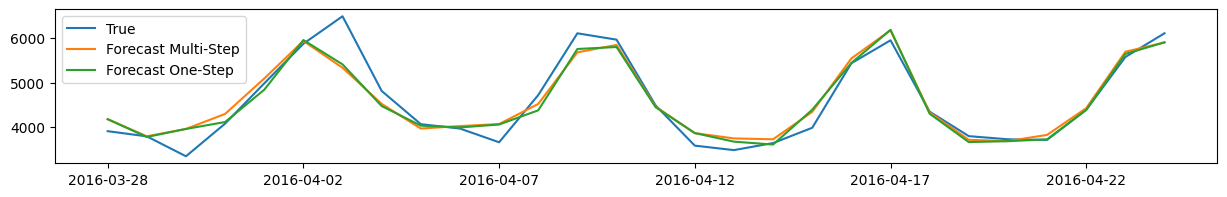

In [80]:
recursive_x = test_x[0, :]

forecast_ms = []
for i in range(test_x.shape[0]):
    pred = model.predict(recursive_x.reshape((1, recursive_x.shape[0])))
    recursive_x = np.append(recursive_x[1:], pred)
    forecast_ms.append(pred)
    
forecast_ms_rec = np.asarray(forecast_ms).flatten()
forecast_os = model.predict(test_x)

print('  One-Step MAE: %.4f' % (np.mean(np.abs(forecast_os - test_y))))
print('Multi-Step MAE: %.4f' % (np.mean(np.abs(forecast_ms_rec - test_y))))

plt.rcParams['figure.figsize'] = [plot_x_size, plot_y_size]

series[-test_size:].plot(label = 'True')
plt.plot(forecast_ms_rec, label = 'Forecast Multi-Step')
plt.plot(forecast_os, label = 'Forecast One-Step')
plt.legend()
plt.show()

### Predição direta

In [81]:
### HYPERPARAMETERS ###
window_size = 365
prediction_horizon = 28

### TRAIN VAL SPLIT ###
test_size = 28
split_time = len(series) - test_size

train_series = series[:split_time]
test_series = series[split_time - window_size:]

train_x, train_y = create_xy(train_series, window_size, prediction_horizon)
test_x, test_y = create_xy(test_series, window_size, prediction_horizon)

In [82]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(lgb.LGBMRegressor(), n_jobs = -1)

model.fit(train_x, train_y)

MultiOutputRegressor(estimator=LGBMRegressor(), n_jobs=-1)

  One-Step MAE: 200.5037
Multi-Step MAE: 233.6326


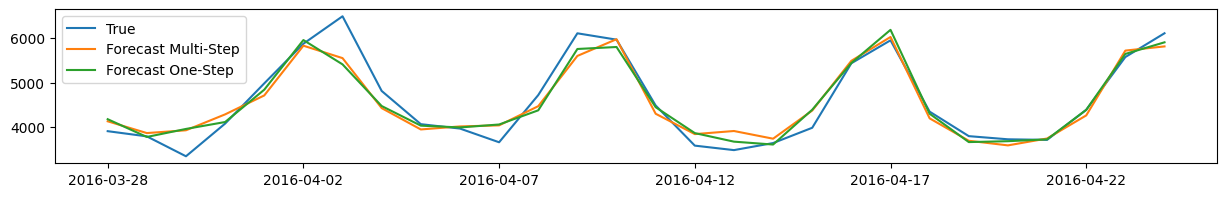

In [83]:
forecast_ms_dir = model.predict(test_x)

print('  One-Step MAE: %.4f' % (np.mean(np.abs(forecast_os - test_y))))
print('Multi-Step MAE: %.4f' % (np.mean(np.abs(forecast_ms_dir - test_y))))

plt.rcParams['figure.figsize'] = [plot_x_size, plot_y_size]

series[-test_size:].plot(label = 'True')
plt.plot(forecast_ms_dir.T, label = 'Forecast Multi-Step')
plt.plot(forecast_os, label = 'Forecast One-Step')
plt.legend()
plt.show()

### Single-Shot Forecasting

  Recursive MAE: 214.8020
     Direct MAE: 233.6326
Combination MAE: 217.0313


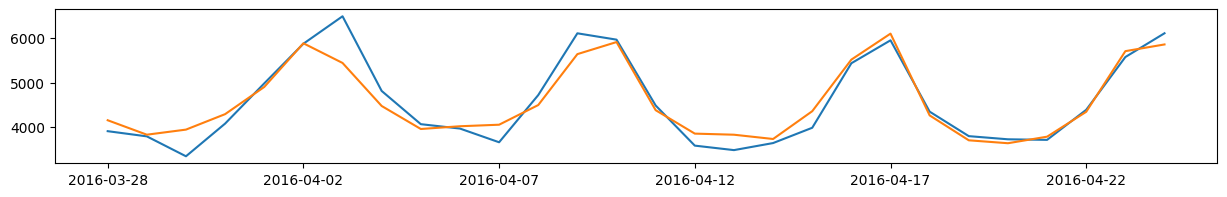

In [84]:
forecast_ms_comb = 0.5*forecast_ms_dir.flatten() + 0.5*forecast_ms_rec

print('  Recursive MAE: %.4f' % (np.mean(np.abs(forecast_ms_rec - test_y))))
print('     Direct MAE: %.4f' % (np.mean(np.abs(forecast_ms_dir - test_y))))
print('Combination MAE: %.4f' % (np.mean(np.abs(forecast_ms_comb - test_y))))

series[-test_size:].plot(label = 'True')
plt.plot(forecast_ms_comb, label = 'Forecast Combination')
plt.show()

### Importância de variáveis

In [85]:
### HYPERPARAMETERS ###
window_size = 365
prediction_horizon = 1

### TRAIN VAL SPLIT ###
test_size = 28
split_time = len(series) - test_size

train_series = series[:split_time]
test_series = series[split_time - window_size:]

train_x, train_y = create_xy(train_series, window_size, prediction_horizon)
test_x, test_y = create_xy(test_series, window_size, prediction_horizon)

train_y = train_y.flatten()
test_y = test_y.flatten()
    
params = {
    'n_estimators': 2000,
    'max_depth': 4,
    'num_leaves': 2**4,
    'learning_rate': 0.1,
    'boosting_type': 'dart'
}

model = lgb.LGBMRegressor(first_metric_only = True, **params)

feature_name_list = ['lag_' + str(i+1) for i in range(window_size)]

model.fit(train_x, train_y,
          eval_metric = 'l1', 
          eval_set = [(test_x, test_y)],
          #early_stopping_rounds = 10,
          feature_name = feature_name_list)

[1]	valid_0's l1: 758.624	valid_0's l2: 903138
[2]	valid_0's l1: 712.283	valid_0's l2: 783225
[3]	valid_0's l1: 662.372	valid_0's l2: 673450
[4]	valid_0's l1: 614.662	valid_0's l2: 581461
[5]	valid_0's l1: 576.865	valid_0's l2: 511947
[6]	valid_0's l1: 538.852	valid_0's l2: 449292
[7]	valid_0's l1: 504.128	valid_0's l2: 398902
[8]	valid_0's l1: 522.647	valid_0's l2: 427950
[9]	valid_0's l1: 489.625	valid_0's l2: 382934
[10]	valid_0's l1: 460.859	valid_0's l2: 345705
[11]	valid_0's l1: 440.233	valid_0's l2: 317709
[12]	valid_0's l1: 450.726	valid_0's l2: 331423
[13]	valid_0's l1: 425.442	valid_0's l2: 298189
[14]	valid_0's l1: 407.007	valid_0's l2: 272571
[15]	valid_0's l1: 388.903	valid_0's l2: 252209
[16]	valid_0's l1: 372.495	valid_0's l2: 236172
[17]	valid_0's l1: 353.032	valid_0's l2: 217354
[18]	valid_0's l1: 342.903	valid_0's l2: 206629
[19]	valid_0's l1: 327.166	valid_0's l2: 191970
[20]	valid_0's l1: 316.266	valid_0's l2: 180193
[21]	valid_0's l1: 323.84	valid_0's l2: 187320
[2

[227]	valid_0's l1: 339.565	valid_0's l2: 191538
[228]	valid_0's l1: 324.204	valid_0's l2: 178417
[229]	valid_0's l1: 333.942	valid_0's l2: 187132
[230]	valid_0's l1: 318.804	valid_0's l2: 172964
[231]	valid_0's l1: 305.077	valid_0's l2: 161523
[232]	valid_0's l1: 292.286	valid_0's l2: 151561
[233]	valid_0's l1: 302.64	valid_0's l2: 159246
[234]	valid_0's l1: 291.339	valid_0's l2: 150903
[235]	valid_0's l1: 302.188	valid_0's l2: 159026
[236]	valid_0's l1: 291.626	valid_0's l2: 151898
[237]	valid_0's l1: 282.898	valid_0's l2: 145829
[238]	valid_0's l1: 272.892	valid_0's l2: 139504
[239]	valid_0's l1: 263.994	valid_0's l2: 134871
[240]	valid_0's l1: 255.874	valid_0's l2: 130212
[241]	valid_0's l1: 266.589	valid_0's l2: 136080
[242]	valid_0's l1: 255.352	valid_0's l2: 129803
[243]	valid_0's l1: 265.056	valid_0's l2: 135021
[244]	valid_0's l1: 299.076	valid_0's l2: 156707
[245]	valid_0's l1: 287.35	valid_0's l2: 148884
[246]	valid_0's l1: 277.34	valid_0's l2: 142365
[247]	valid_0's l1: 265

[396]	valid_0's l1: 217.893	valid_0's l2: 111496
[397]	valid_0's l1: 216.61	valid_0's l2: 110897
[398]	valid_0's l1: 216.031	valid_0's l2: 110299
[399]	valid_0's l1: 215.413	valid_0's l2: 109398
[400]	valid_0's l1: 214.626	valid_0's l2: 108783
[401]	valid_0's l1: 216.033	valid_0's l2: 110136
[402]	valid_0's l1: 215.706	valid_0's l2: 109302
[403]	valid_0's l1: 217.412	valid_0's l2: 110940
[404]	valid_0's l1: 215.079	valid_0's l2: 109243
[405]	valid_0's l1: 214.797	valid_0's l2: 109004
[406]	valid_0's l1: 224.742	valid_0's l2: 113662
[407]	valid_0's l1: 221.532	valid_0's l2: 112398
[408]	valid_0's l1: 225.311	valid_0's l2: 114081
[409]	valid_0's l1: 222.59	valid_0's l2: 112610
[410]	valid_0's l1: 219.058	valid_0's l2: 111356
[411]	valid_0's l1: 217.293	valid_0's l2: 110543
[412]	valid_0's l1: 220.743	valid_0's l2: 112011
[413]	valid_0's l1: 224.993	valid_0's l2: 113816
[414]	valid_0's l1: 221.529	valid_0's l2: 111901
[415]	valid_0's l1: 219.074	valid_0's l2: 110810
[416]	valid_0's l1: 21

[584]	valid_0's l1: 225.493	valid_0's l2: 116278
[585]	valid_0's l1: 221.713	valid_0's l2: 114415
[586]	valid_0's l1: 224.433	valid_0's l2: 115844
[587]	valid_0's l1: 221.821	valid_0's l2: 114429
[588]	valid_0's l1: 224.508	valid_0's l2: 115683
[589]	valid_0's l1: 227.179	valid_0's l2: 116939
[590]	valid_0's l1: 231.113	valid_0's l2: 118575
[591]	valid_0's l1: 234.199	valid_0's l2: 119960
[592]	valid_0's l1: 237.567	valid_0's l2: 121593
[593]	valid_0's l1: 232.236	valid_0's l2: 119149
[594]	valid_0's l1: 236.021	valid_0's l2: 120825
[595]	valid_0's l1: 239.208	valid_0's l2: 122455
[596]	valid_0's l1: 233.267	valid_0's l2: 119461
[597]	valid_0's l1: 236.468	valid_0's l2: 121035
[598]	valid_0's l1: 239.584	valid_0's l2: 122515
[599]	valid_0's l1: 233.429	valid_0's l2: 118743
[600]	valid_0's l1: 228.598	valid_0's l2: 116668
[601]	valid_0's l1: 223.85	valid_0's l2: 114636
[602]	valid_0's l1: 226.914	valid_0's l2: 116043
[603]	valid_0's l1: 222.849	valid_0's l2: 113986
[604]	valid_0's l1: 2

[786]	valid_0's l1: 219.357	valid_0's l2: 108885
[787]	valid_0's l1: 220.366	valid_0's l2: 109636
[788]	valid_0's l1: 221.81	valid_0's l2: 110540
[789]	valid_0's l1: 220.159	valid_0's l2: 109681
[790]	valid_0's l1: 218.252	valid_0's l2: 108306
[791]	valid_0's l1: 217.038	valid_0's l2: 107393
[792]	valid_0's l1: 217.648	valid_0's l2: 108105
[793]	valid_0's l1: 216.516	valid_0's l2: 106835
[794]	valid_0's l1: 217.187	valid_0's l2: 107567
[795]	valid_0's l1: 216.073	valid_0's l2: 106692
[796]	valid_0's l1: 216.676	valid_0's l2: 107452
[797]	valid_0's l1: 217.616	valid_0's l2: 108284
[798]	valid_0's l1: 218.595	valid_0's l2: 109116
[799]	valid_0's l1: 217.404	valid_0's l2: 107982
[800]	valid_0's l1: 218.448	valid_0's l2: 108888
[801]	valid_0's l1: 216.918	valid_0's l2: 107921
[802]	valid_0's l1: 217.85	valid_0's l2: 108795
[803]	valid_0's l1: 219.074	valid_0's l2: 109607
[804]	valid_0's l1: 220.605	valid_0's l2: 110636
[805]	valid_0's l1: 221.726	valid_0's l2: 111389
[806]	valid_0's l1: 22

[968]	valid_0's l1: 206.678	valid_0's l2: 105243
[969]	valid_0's l1: 207.209	valid_0's l2: 105687
[970]	valid_0's l1: 206.46	valid_0's l2: 104930
[971]	valid_0's l1: 205.745	valid_0's l2: 104548
[972]	valid_0's l1: 206.082	valid_0's l2: 104434
[973]	valid_0's l1: 206.207	valid_0's l2: 104950
[974]	valid_0's l1: 206.77	valid_0's l2: 105449
[975]	valid_0's l1: 207.257	valid_0's l2: 105931
[976]	valid_0's l1: 206.79	valid_0's l2: 105324
[977]	valid_0's l1: 207.364	valid_0's l2: 105851
[978]	valid_0's l1: 206.205	valid_0's l2: 105275
[979]	valid_0's l1: 206.615	valid_0's l2: 105744
[980]	valid_0's l1: 206.135	valid_0's l2: 105367
[981]	valid_0's l1: 206.714	valid_0's l2: 105899
[982]	valid_0's l1: 207.358	valid_0's l2: 106459
[983]	valid_0's l1: 207.42	valid_0's l2: 106589
[984]	valid_0's l1: 206.539	valid_0's l2: 105758
[985]	valid_0's l1: 207.066	valid_0's l2: 106241
[986]	valid_0's l1: 207.572	valid_0's l2: 106867
[987]	valid_0's l1: 207.987	valid_0's l2: 107327
[988]	valid_0's l1: 207.

[1159]	valid_0's l1: 202.594	valid_0's l2: 100508
[1160]	valid_0's l1: 201.406	valid_0's l2: 99395.6
[1161]	valid_0's l1: 202.044	valid_0's l2: 99741.8
[1162]	valid_0's l1: 201.909	valid_0's l2: 99544.6
[1163]	valid_0's l1: 201.547	valid_0's l2: 99068.2
[1164]	valid_0's l1: 201.725	valid_0's l2: 99354.2
[1165]	valid_0's l1: 202.161	valid_0's l2: 99845.4
[1166]	valid_0's l1: 201.835	valid_0's l2: 99520.3
[1167]	valid_0's l1: 201.551	valid_0's l2: 99246.1
[1168]	valid_0's l1: 203.783	valid_0's l2: 100463
[1169]	valid_0's l1: 204.475	valid_0's l2: 100905
[1170]	valid_0's l1: 205.31	valid_0's l2: 101427
[1171]	valid_0's l1: 203.86	valid_0's l2: 100842
[1172]	valid_0's l1: 204.543	valid_0's l2: 101319
[1173]	valid_0's l1: 203.111	valid_0's l2: 100484
[1174]	valid_0's l1: 204.019	valid_0's l2: 101001
[1175]	valid_0's l1: 204.557	valid_0's l2: 101528
[1176]	valid_0's l1: 202.804	valid_0's l2: 100236
[1177]	valid_0's l1: 206.738	valid_0's l2: 101776
[1178]	valid_0's l1: 207.918	valid_0's l2: 1

[1344]	valid_0's l1: 198.957	valid_0's l2: 97435
[1345]	valid_0's l1: 199.753	valid_0's l2: 97796.1
[1346]	valid_0's l1: 200.599	valid_0's l2: 98165.4
[1347]	valid_0's l1: 199.696	valid_0's l2: 97432.5
[1348]	valid_0's l1: 200.348	valid_0's l2: 97741.9
[1349]	valid_0's l1: 199.205	valid_0's l2: 97180
[1350]	valid_0's l1: 200.008	valid_0's l2: 97538.2
[1351]	valid_0's l1: 198.11	valid_0's l2: 96305.6
[1352]	valid_0's l1: 198.831	valid_0's l2: 96634
[1353]	valid_0's l1: 197.989	valid_0's l2: 96169.4
[1354]	valid_0's l1: 197.722	valid_0's l2: 95845.4
[1355]	valid_0's l1: 197.463	valid_0's l2: 95423.5
[1356]	valid_0's l1: 197.19	valid_0's l2: 95061.9
[1357]	valid_0's l1: 196.562	valid_0's l2: 94568.8
[1358]	valid_0's l1: 196.764	valid_0's l2: 94755.9
[1359]	valid_0's l1: 196.712	valid_0's l2: 94602.8
[1360]	valid_0's l1: 196.995	valid_0's l2: 94831.8
[1361]	valid_0's l1: 196.679	valid_0's l2: 94619.3
[1362]	valid_0's l1: 196.655	valid_0's l2: 94494.1
[1363]	valid_0's l1: 196.346	valid_0's 

[1525]	valid_0's l1: 200.284	valid_0's l2: 94737
[1526]	valid_0's l1: 198.62	valid_0's l2: 93922.6
[1527]	valid_0's l1: 197.702	valid_0's l2: 93768.7
[1528]	valid_0's l1: 198.378	valid_0's l2: 94052.2
[1529]	valid_0's l1: 199.044	valid_0's l2: 94369
[1530]	valid_0's l1: 199.762	valid_0's l2: 94698.6
[1531]	valid_0's l1: 200.546	valid_0's l2: 94979.3
[1532]	valid_0's l1: 199.38	valid_0's l2: 94615.5
[1533]	valid_0's l1: 200.157	valid_0's l2: 94942.5
[1534]	valid_0's l1: 199.199	valid_0's l2: 94568
[1535]	valid_0's l1: 197.816	valid_0's l2: 94092.8
[1536]	valid_0's l1: 198.519	valid_0's l2: 94354.7
[1537]	valid_0's l1: 196.989	valid_0's l2: 93683.3
[1538]	valid_0's l1: 197.809	valid_0's l2: 93956.6
[1539]	valid_0's l1: 196.856	valid_0's l2: 93532.7
[1540]	valid_0's l1: 197.738	valid_0's l2: 93806.6
[1541]	valid_0's l1: 196.97	valid_0's l2: 93962.8
[1542]	valid_0's l1: 197.632	valid_0's l2: 94242.6
[1543]	valid_0's l1: 196.507	valid_0's l2: 93667.2
[1544]	valid_0's l1: 195.821	valid_0's l

[1713]	valid_0's l1: 199.931	valid_0's l2: 94797.9
[1714]	valid_0's l1: 199.615	valid_0's l2: 94455.2
[1715]	valid_0's l1: 199.932	valid_0's l2: 94610.1
[1716]	valid_0's l1: 199.556	valid_0's l2: 94389.4
[1717]	valid_0's l1: 199.822	valid_0's l2: 94502.9
[1718]	valid_0's l1: 200.287	valid_0's l2: 94704
[1719]	valid_0's l1: 200.606	valid_0's l2: 94907.1
[1720]	valid_0's l1: 200.271	valid_0's l2: 94564.2
[1721]	valid_0's l1: 199.579	valid_0's l2: 94279.3
[1722]	valid_0's l1: 200.031	valid_0's l2: 94487.6
[1723]	valid_0's l1: 199.247	valid_0's l2: 94085.9
[1724]	valid_0's l1: 199.119	valid_0's l2: 94126.7
[1725]	valid_0's l1: 199.651	valid_0's l2: 94393.5
[1726]	valid_0's l1: 200.073	valid_0's l2: 94545.5
[1727]	valid_0's l1: 199.317	valid_0's l2: 94324.7
[1728]	valid_0's l1: 199.225	valid_0's l2: 94426.2
[1729]	valid_0's l1: 199.488	valid_0's l2: 94616.1
[1730]	valid_0's l1: 199.023	valid_0's l2: 94323.8
[1731]	valid_0's l1: 199.234	valid_0's l2: 94474.2
[1732]	valid_0's l1: 199.739	vali

[1883]	valid_0's l1: 201.095	valid_0's l2: 93794.5
[1884]	valid_0's l1: 201.618	valid_0's l2: 94061
[1885]	valid_0's l1: 201.264	valid_0's l2: 93740
[1886]	valid_0's l1: 201.69	valid_0's l2: 93960.5
[1887]	valid_0's l1: 202.123	valid_0's l2: 94204.2
[1888]	valid_0's l1: 201.739	valid_0's l2: 93838.5
[1889]	valid_0's l1: 202.06	valid_0's l2: 94001.2
[1890]	valid_0's l1: 202.456	valid_0's l2: 94229
[1891]	valid_0's l1: 201.763	valid_0's l2: 93750.3
[1892]	valid_0's l1: 201.446	valid_0's l2: 93454.1
[1893]	valid_0's l1: 200.872	valid_0's l2: 93110.5
[1894]	valid_0's l1: 200.591	valid_0's l2: 92880.8
[1895]	valid_0's l1: 200.555	valid_0's l2: 92787.1
[1896]	valid_0's l1: 200.312	valid_0's l2: 92724.9
[1897]	valid_0's l1: 200.463	valid_0's l2: 92745.1
[1898]	valid_0's l1: 200.108	valid_0's l2: 92476.5
[1899]	valid_0's l1: 200.115	valid_0's l2: 92611.3
[1900]	valid_0's l1: 200.182	valid_0's l2: 92746
[1901]	valid_0's l1: 200.379	valid_0's l2: 92867.2
[1902]	valid_0's l1: 200.571	valid_0's l2

LGBMRegressor(boosting_type='dart', first_metric_only=True, max_depth=4,
              n_estimators=2000, num_leaves=16)

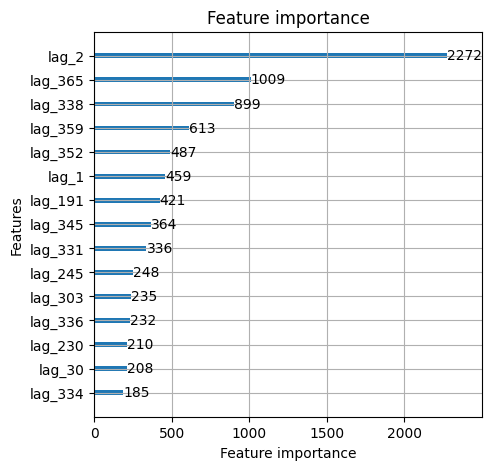

In [86]:
plt.rcParams['figure.figsize'] = [5, 5]

lgb.plot_importance(model, max_num_features = 15, importance_type = 'split')
plt.show()

**Referências:**

- https://phdinds-aim.github.io/time_series_handbook/08_WinningestMethods/lightgbm_m5_forecasting.html

## Modelos clássicos ARIMA

### Remove outliers

In [241]:
from hampel import hampel
hseries = hampel(series, window_size=365, imputation=True)

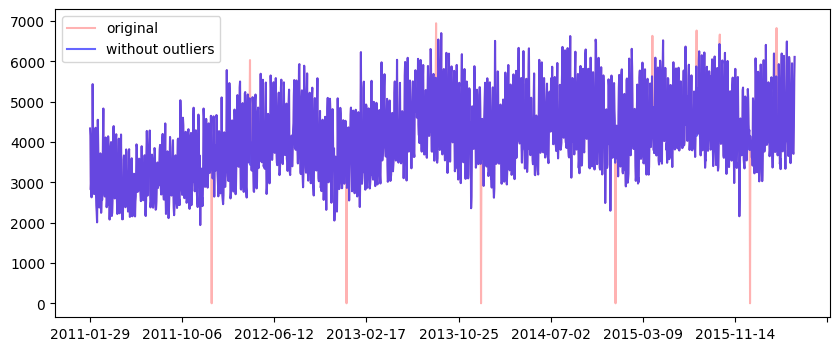

In [242]:
series.plot(alpha=0.3, color='red', label="original")
hseries.plot(alpha=0.6, color='blue', label='without outliers')
plt.legend()
plt.show()

### train test split

In [243]:
hseries.index = pd.to_datetime(hseries.index)

In [273]:
hseries.shape

(1913,)

In [277]:
hseries.index.nunique()

1913

In [278]:
hseries.value_counts()

4153.0    6
3818.0    5
4018.0    5
3843.0    5
3947.0    4
         ..
4839.0    1
3914.0    1
3176.0    1
2319.0    1
6113.0    1
Name: CA_1, Length: 1457, dtype: int64

In [276]:
idx = pd.date_range(hseries.index.min(), hseries.index.max())
len(idx)

1913

In [246]:
hseries.index.dtype

dtype('<M8[ns]')

In [248]:
train_series = hseries.loc[:hseries.index.max() - timedelta(days=28)]
test_series = hseries.loc[hseries.index.max() - timedelta(days=28):]

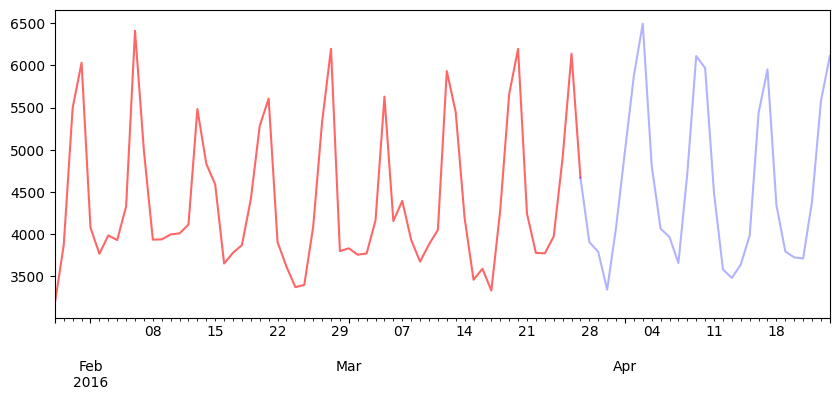

In [251]:
train_series.iloc[-60:].plot(color='red', alpha=0.6, label="treino")
test_series.plot(color='blue', alpha=0.3, label="teste")
plt.show()

### Parâmetro p do modelo ARIMA(p,d,q)

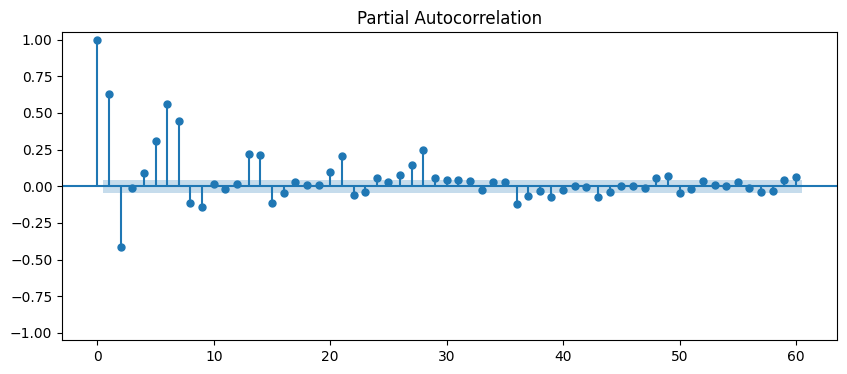

In [252]:
plt.rcParams['figure.figsize'] = [10,4]
sm.graphics.tsa.plot_pacf(
    train_series, 
    lags=60,
    method='ywm'
)
plt.ylim([-1.05,1.05])
plt.show()

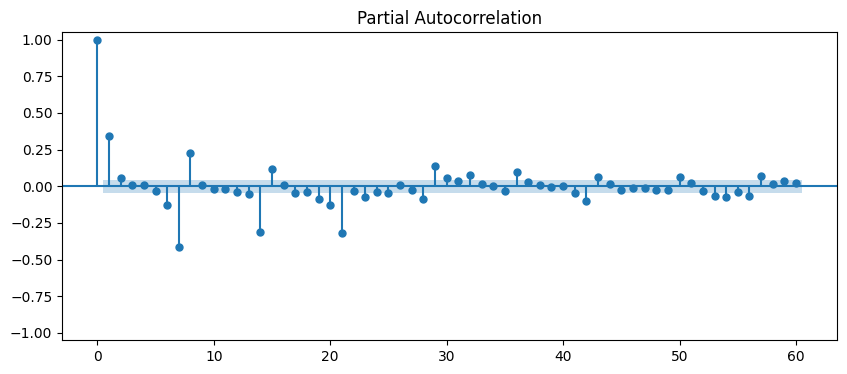

In [270]:
plt.rcParams['figure.figsize'] = [10,4]
sm.graphics.tsa.plot_pacf(
    train_series.diff(7).dropna(), 
    lags=60,
    method='ywm'
)
plt.ylim([-1.05,1.05])
plt.show()

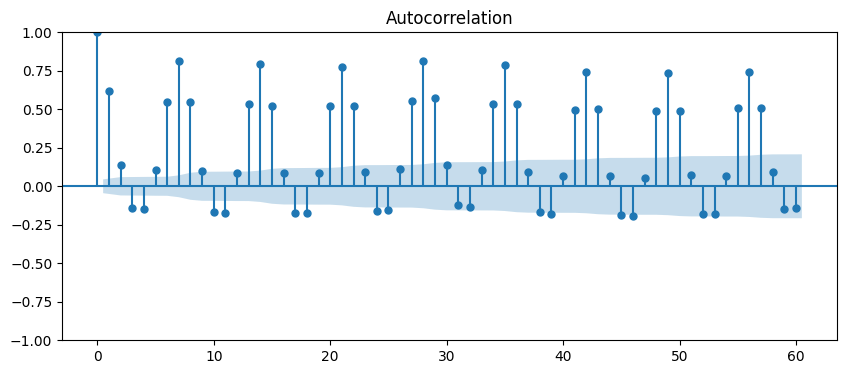

In [269]:
plt.rcParams['figure.figsize'] = [10,4]
sm.graphics.tsa.plot_acf(
    series, 
    lags=60
)
plt.show()

In [338]:
import warnings
warnings.filterwarnings('ignore')

In [341]:
from statsmodels.tsa.arima.model import ARIMA

for p in range(1,6,1):
    for d in range(0,2):
        for q in range(0,4): 
            model = ARIMA(train_series, order=(p,d,q), freq="D" )
            model_fit = model.fit()
            pred = model_fit.forecast(steps=28)
            print('ARIMA({},{},{}): {:.4f}'.format(p, d, q, np.mean(np.abs(pred - test_series[1:]))))

ARIMA(1,0,0): 837.3378
ARIMA(1,0,1): 807.8805
ARIMA(1,0,2): 809.2413
ARIMA(1,0,3): 784.2524
ARIMA(1,1,0): 813.2700
ARIMA(1,1,1): 816.9120
ARIMA(1,1,2): 791.9408
ARIMA(1,1,3): 784.0631
ARIMA(2,0,0): 800.6784
ARIMA(2,0,1): 799.7642
ARIMA(2,0,2): 792.9921
ARIMA(2,0,3): 582.4472
ARIMA(2,1,0): 806.0322
ARIMA(2,1,1): 786.9609
ARIMA(2,1,2): 664.1645
ARIMA(2,1,3): 346.4654
ARIMA(3,0,0): 799.3062
ARIMA(3,0,1): 799.0659
ARIMA(3,0,2): 617.0176
ARIMA(3,0,3): 339.3746
ARIMA(3,1,0): 795.5625
ARIMA(3,1,1): 736.6959
ARIMA(3,1,2): 462.6087
ARIMA(3,1,3): 357.3123
ARIMA(4,0,0): 801.2148
ARIMA(4,0,1): 736.0759
ARIMA(4,0,2): 778.1372
ARIMA(4,0,3): 852.8774
ARIMA(4,1,0): 768.9899
ARIMA(4,1,1): 628.3531
ARIMA(4,1,2): 379.0203
ARIMA(4,1,3): 354.5302
ARIMA(5,0,0): 786.7046
ARIMA(5,0,1): 617.9455
ARIMA(5,0,2): 568.7855
ARIMA(5,0,3): 350.6905
ARIMA(5,1,0): 617.5885
ARIMA(5,1,1): 519.5405
ARIMA(5,1,2): 357.8630
ARIMA(5,1,3): 358.4353


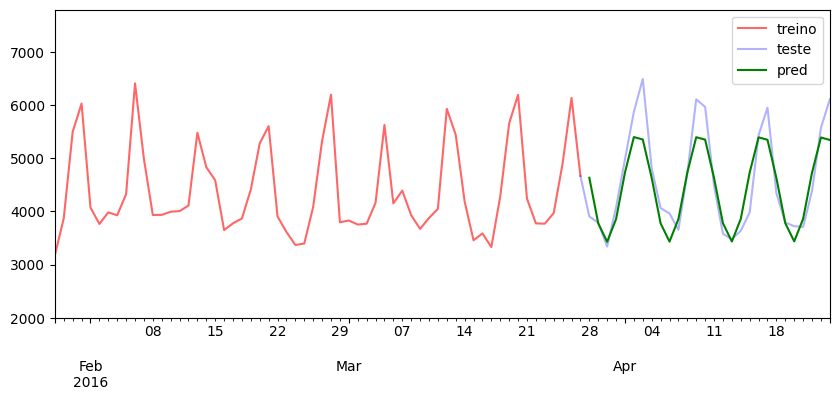

In [342]:
model = ARIMA(train_series, order=(3,0,3), freq="D" )
model_fit = model.fit()
pred = model_fit.forecast(steps=28)

train_series.iloc[-60:].plot(color='red', alpha=0.6, label="treino")
test_series.plot(color='blue', alpha=0.3, label="teste")
pred.plot(color='green', label="pred")
plt.ylim([2000,7800])
plt.legend()
plt.show()